**Ridge regression**

In [23]:
!pip install mglearn

Este modelo tiene la caracteristica de tener una pendiente muy pequeña, lo cual puede resultar beneficioso en la prediccion en modelos. (Si haces la prueba con una regresion clasica de minimos cuadrados ordinarios, la prediccion sera peor)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train , y_train)
print("Train accuracy: {}".format(ridge.score(X_train,y_train)))
print("Test accuracy: {}".format(ridge.score(X_test,y_test)))

Train accuracy: 0.8857966585170941
Test accuracy: 0.7527683481744752


Se puede modificar al parametro alpha para cambiar al comportamiento de la regresión. Como valor por defecto, apha es igual a 1.0, pero si se este es aumentado la pendiente se acerca mas al cero y por el contrario si decrece, se aleja de este comportandose mas como una regresion lineal por minimos cuadaros ordinarios.

In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Al aumentar alpha, la regresión se vuelve mas restrictiva, perdiendo generalidad (Es mas propensa a producir un overfitting)

In [26]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Al reducir el parametro alpha, la regresion tiende, en cambio, a ser menos restrictiva (Es mas propensa a un underfitting)

**Lasso Regression**

Esta regresión es similar a la regresion Ridge puesto que tambien hace acercar sus coeficientes a 0, con la particularidad de algunos si llegan a tener el valor 0 haciéndo que se eliminen. Esta regresión reduce el número de features, encontrando features sin relevancia

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Como se puede notar, el modelo resulta ser muy poco restrictivo para este caso, causando un underfitting, sin embargo se pueden solucionar reduciendo el parametro alpha, pero al hacer esto se debe aumentar el número máximo de iteraciones max_iter

In [28]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Si se reduce mucho el aplha puede llegar a un overfitting

In [29]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


# **Modelos lineales de clasificación**

**SVM y Logitic regression**

Ambos modelos actúan usando L2 Regularization (Ridge regression). Por esto cuentan con un parámetro **c** que actúa de la misma forma que el parámetro _alpha_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


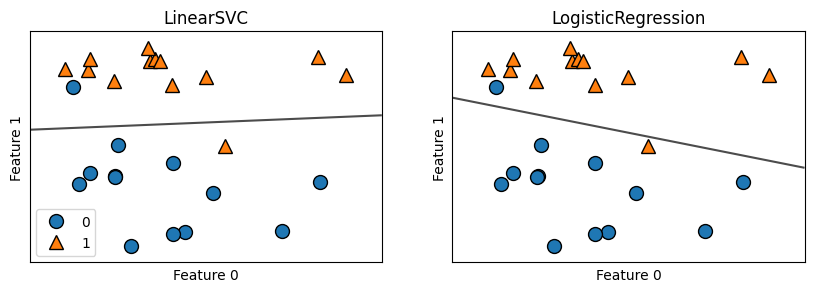

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
axes[0].legend()


In [31]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Notas de estudiante**

**Usando logistic regression**

In [32]:
route = 'student_exam_data.csv'

data = pd.read_csv(route)
data

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


In [33]:
x = data[['Study Hours','Previous Exam Score']]
y = np.ravel(data[['Pass/Fail']])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=31)
logreg = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.868
Test set score: 0.860


In [34]:
y_trainScore = []
y_testScore = []
for e in np.arange(0.1,100,0.1):
    l1 = LogisticRegression(C=e).fit(X_train,y_train)
    y_trainScore.append(l1.score(X_train,y_train))
    l2 = LogisticRegression(C=e).fit(X_test,y_test)
    y_testScore.append(l2.score(X_test,y_test))

y_trainScore = np.array(y_trainScore)
y_testScore = np.array(y_testScore)



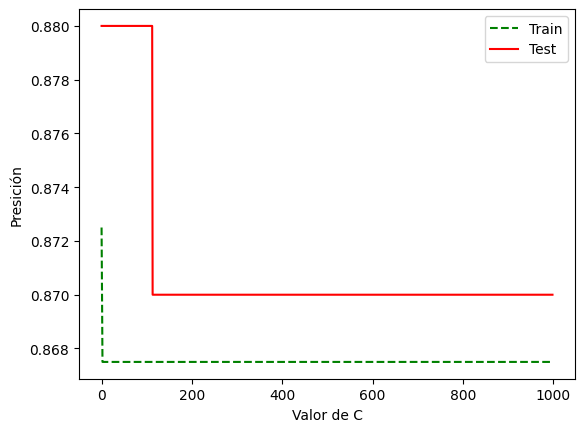

In [35]:
import matplotlib.pyplot as plt

X_trainScore = np.arange(999)

plt.plot(X_trainScore,y_trainScore,ls="--",c='g',label='Train')
plt.plot(X_trainScore,y_testScore,c='r',label='Test')
plt.xlabel('Valor de C')
plt.ylabel('Presición')
plt.legend()
plt.show()

In [36]:
example = pd.DataFrame([[9.356520,89.546523]],columns=['Study Hours','Previous Exam Score'])
predict = logreg.predict(example)
proba = logreg.predict_proba(example)
logProba = logreg.predict_log_proba(example)

print(f'Predicción:{predict}\nProbabilidad:{proba}\nProbabilidad logarítmica:{logProba}')

Predicción:[1]
Probabilidad:[[0.00333059 0.99666941]]
Probabilidad logarítmica:[[-5.70460542e+00 -3.33615009e-03]]


# **Usando Linear SVC**

Toma en cuenta que este metodo, a diferencia SVC() puede hacer clasificaciones de varias categorías, no solo 1 contra 1

In [37]:
model = LinearSVC(C=74).fit(X_train,y_train)
print("Training set score: {:.3f}".format(model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model.score(X_test, y_test)))

Training set score: 0.858
Test set score: 0.840


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
y_trainScore = []
y_testScore = []
for e in np.arange(0.1,100,0.1):
    l1 = LinearSVC(C=e).fit(X_train,y_train)
    y_trainScore.append(l1.score(X_train,y_train))
    l2 = LinearSVC(C=e).fit(X_test,y_test)
    y_testScore.append(l2.score(X_test,y_test))

y_trainScore = np.array(y_trainScore)
y_testScore = np.array(y_testScore)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

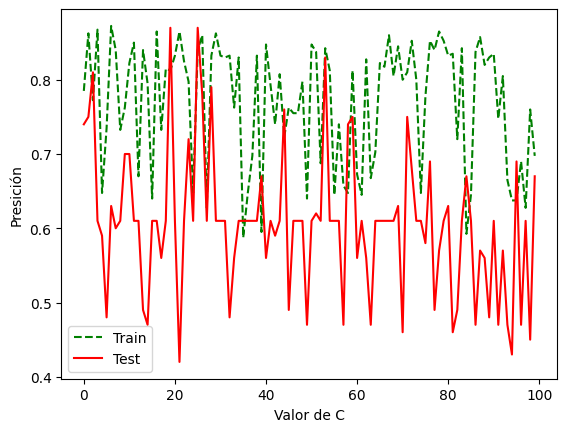

In [39]:
X_trainScore = np.arange(100)

plt.plot(X_trainScore,y_trainScore[:100],ls="--",c='g',label='Train')
plt.plot(X_trainScore,y_testScore[:100],c='r',label='Test')
plt.xlabel('Valor de C')
plt.ylabel('Presición')
plt.legend()
plt.show()

In [40]:
example = pd.DataFrame([[7.356520,81.546523]],columns=['Study Hours','Previous Exam Score'])
predict = model.predict(example)

print(f'Predicción:{predict}\nProbabilidad:{proba}\nProbabilidad logarítmica:{logProba}')

Predicción:[1]
Probabilidad:[[0.00333059 0.99666941]]
Probabilidad logarítmica:[[-5.70460542e+00 -3.33615009e-03]]


#**USANDO SVC del método SVC()**

Este método está hecho solo para problemas de clasificación 1 contra 1 como este

In [41]:
from sklearn.svm import SVC

model = SVC(C=80)
model.fit(X_train,y_train)
print("Training set score: {:.3f}".format(model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model.score(X_test, y_test)))

Training set score: 0.970
Test set score: 0.950


In [42]:
y_trainScore = []
y_testScore = []
for e in np.arange(0.1,100,0.1):
    l1 = SVC(C=e).fit(X_train,y_train)
    y_trainScore.append(l1.score(X_train,y_train))
    l2 = SVC(C=e).fit(X_test,y_test)
    y_testScore.append(l2.score(X_test,y_test))

y_trainScore = np.array(y_trainScore)
y_testScore = np.array(y_testScore)

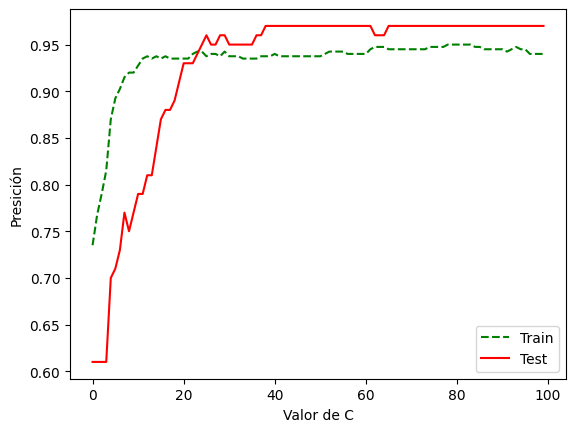

In [43]:
X_trainScore = np.arange(100)

plt.plot(X_trainScore,y_trainScore[:100],ls="--",c='g',label='Train')
plt.plot(X_trainScore,y_testScore[:100],c='r',label='Test')
plt.xlabel('Valor de C')
plt.ylabel('Presición')
plt.legend()
plt.show()

#**Naive Bayes**

Este algoritmo se basa en el teormea de bayes (es una versión modificada) para clasificar mediante probabilidad. Este algoritmo cuenta con 3 métodos,  GaussianNB, BernoulliNB, and MultinomialNB:

**GaussianNB**: Se utiliza para features con valores continuos.

**BernoulliNB**: Se utiliza para features con valores binarios.(Puedes señalar un parámetro alpha, el cual al aumentar resulta en un mayor "smoothing" haciendo menos complejo (previniendo el overfitting) el modelo mediante la creación algunos datos virtuales)

**MultinomialNB**: Se utiliza para features con valores enteros (Para contar cosas como cantidad de veces que una palabra aparece en un texto).(Cuenta con el mismo parámetro alpha que *BernoulliNB*

Existen mas modelos, pero los mas importantes son los mencionados. Es destacable señalar que estos métodos son muy utilizados en grandes cantidades de datos y matrices sparce. Estos resultan ser mas rápidos que otros modelos lineales.

In [44]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

print("Training set score: {:.3f}".format(model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(model.score(X_test, y_test)))

Training set score: 0.945
Test set score: 0.960


In [45]:
y_prediction = model.predict(X_test)
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        61
           1       1.00      0.90      0.95        39

    accuracy                           0.96       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100

